## Classification of audio files.
### ***Using XGBoost Classifier***

**Using the 3 seconds Feature csv fille to create a model.**
*  Redefined dataset contains more audio clips.
* More audio files leads to better accuracy of the model.
* Each genre now contains 1000 audio files of 3 sec each.

In [7]:
import numpy as np 
import pandas as pd
import os
from sklearn.utils import shuffle
path='../input/gtzan-dataset-music-genre-classification/Data'
data = pd.read_csv(f'{path}/features_3_sec.csv')
data = shuffle(data)
data = shuffle(data)
individual_data=data
data.reset_index(drop=True, inplace=True)
data = data.iloc[0:, 1:] 
print(data.shape)
data.head()

(9990, 59)


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.368661,0.089907,0.136777,0.003727,2102.787761,285711.594149,2165.315558,114084.053008,4547.149940,...,60.298267,-8.022911,36.926826,3.869145,23.138317,-7.450972,55.504036,-0.597575,50.021561,reggae
1,66149,0.428099,0.090115,0.210865,0.004527,3156.719306,573843.731270,3156.129100,106177.702663,7039.038462,...,28.352089,-0.611438,35.150558,-1.910091,55.650455,1.942413,54.683414,-0.855258,58.061546,pop
2,66149,0.310027,0.077679,0.020604,0.000019,1269.709383,7559.361247,1532.112414,9855.621882,2414.534630,...,24.758793,0.670073,10.880815,-3.559293,17.610592,-5.534835,92.326668,-2.063798,110.071571,classical
3,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
4,66149,0.407111,0.093931,0.126104,0.001832,2904.330417,453531.277804,2598.172043,132587.856433,5792.017541,...,88.358803,0.206196,59.542007,-3.295160,97.487244,-5.471354,51.664761,-7.581897,31.810411,rock


In [8]:
print(list(os.listdir(f'{path}/genres_original/')))

['metal', 'country', 'reggae', 'hiphop', 'blues', 'rock', 'jazz', 'classical', 'pop', 'disco']


**Preprocessing and Normalization.**

In [9]:
from sklearn import preprocessing
y = data['label'] 
X = data.loc[:, data.columns != 'label'] 
X = X.loc[:, X.columns != 'length'] 

individual_data = individual_data.loc[:, individual_data.columns != 'label'] 
# Normalize
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

X = pd.DataFrame(np_scaled, columns = cols)


In [10]:
# Splitting the data into Test(20%) and Train(80%) dataframes.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Classification using XGBoost model.**

In [11]:
from sklearn.metrics import roc_auc_score, accuracy_score,roc_curve, precision_recall_curve, auc, confusion_matrix
from xgboost import XGBClassifier, XGBRFClassifier
estimators=[300, 500, 1000]
for x in estimators:    
    for i in range (3,7):
        xgb = XGBClassifier(n_estimators=x, max_depth=i, n_jobs=-1)
        xgb.fit(X_train, y_train)
        preds = xgb.predict(X_test)
        print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n','estimators: ',x,'\n','maxdepth: ', i)
    

Accuracy : 0.91141 
 estimators:  300 
 maxdepth:  3
Accuracy : 0.91291 
 estimators:  300 
 maxdepth:  4
Accuracy : 0.91842 
 estimators:  300 
 maxdepth:  5
Accuracy : 0.91692 
 estimators:  300 
 maxdepth:  6
Accuracy : 0.91592 
 estimators:  500 
 maxdepth:  3
Accuracy : 0.91441 
 estimators:  500 
 maxdepth:  4
Accuracy : 0.91942 
 estimators:  500 
 maxdepth:  5
Accuracy : 0.91692 
 estimators:  500 
 maxdepth:  6
Accuracy : 0.91842 
 estimators:  1000 
 maxdepth:  3
Accuracy : 0.91491 
 estimators:  1000 
 maxdepth:  4
Accuracy : 0.91642 
 estimators:  1000 
 maxdepth:  5
Accuracy : 0.92042 
 estimators:  1000 
 maxdepth:  6


As we can see maximum accuracy is found when MaxDepth is 6 and NumberofEstimators is 1000.

In [16]:

xgb = XGBClassifier(n_estimators=1000, max_depth=6, n_jobs=-1)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
print('Accuracy', ':', round(accuracy_score(y_test, preds), 5))

Accuracy : 0.91141


In [13]:
X_test.tail()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
7292,0.342007,0.528474,0.374576,0.032315,0.327187,0.010576,0.513423,0.006752,0.396216,0.016208,...,0.378516,0.037536,0.318142,0.025764,0.285895,0.076903,0.330284,0.011339,0.433097,0.098862
7710,0.500489,0.587601,0.428766,0.159174,0.362558,0.078925,0.576814,0.078575,0.493199,0.125354,...,0.501143,0.063957,0.302758,0.046440,0.377526,0.038148,0.317981,0.027016,0.566324,0.042921
4094,0.264538,0.726140,0.072400,0.005329,0.034020,0.010769,0.146768,0.032895,0.060222,0.030304,...,0.375567,0.068173,0.402336,0.056963,0.372065,0.022901,0.513787,0.018430,0.476316,0.017895
3944,0.109041,0.613829,0.067118,0.010976,0.058276,0.000984,0.235506,0.065443,0.026002,0.002545,...,0.339062,0.161210,0.371784,0.074339,0.236292,0.038108,0.299923,0.032923,0.346078,0.041725
8256,0.261211,0.705833,0.164827,0.036121,0.212804,0.079508,0.381211,0.036533,0.275360,0.053125,...,0.343911,0.031285,0.321231,0.073604,0.351189,0.075185,0.421979,0.064344,0.484278,0.102547


**Plotting confusion matrices.**

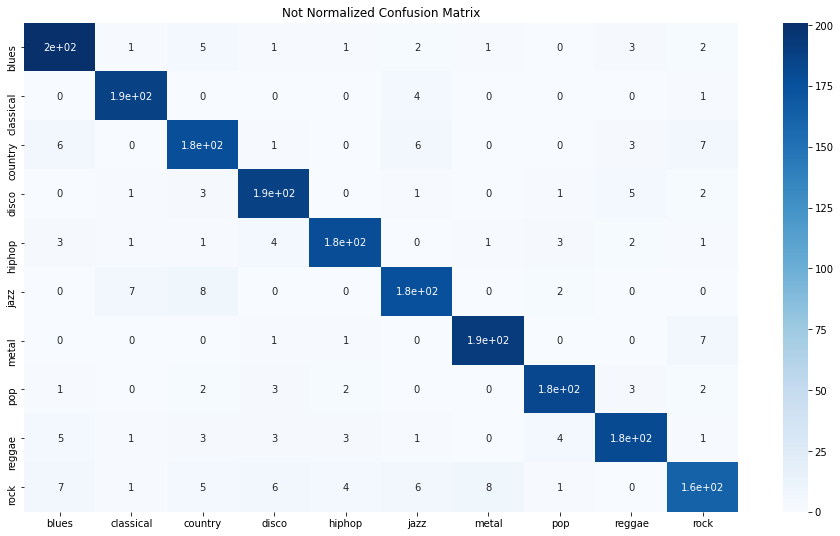

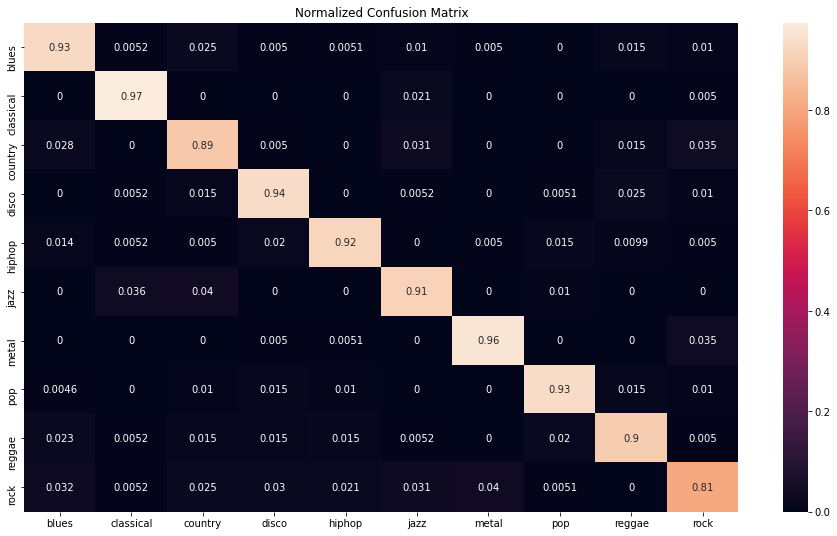

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matr = confusion_matrix(y_test, preds) 
fig1=plt.figure(figsize = (16, 9))
plt.title("Not Normalized Confusion Matrix")
xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]
yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]
sns.heatmap(confusion_matr, cmap="Blues", annot=True, xticklabels=xticklabels,yticklabels=yticklabels);
p1=plt.savefig("confusion matrix")
fig2=plt.figure(figsize=(16,9))
plt.title("Normalized Confusion Matrix")
sns.heatmap(confusion_matr/confusion_matr.sum(axis=1), annot=True,xticklabels=xticklabels,yticklabels=yticklabels)
p2=plt.savefig("normalized confusion matrix")